In [1]:
from Precode2 import *
import numpy

data = np.load('AllSamples.npy')

In [2]:
k1,i_point1,k2,i_point2 = initial_S2('9330') # please replace 0111 with your last four digit of your ID

Strategy 2: k and initial points


In [3]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

4
[2.38952606 7.22195564]
6
[1.713841   4.31350258]


In [4]:
def distance(d1, d2):
    return numpy.sqrt(numpy.sum(numpy.square(d1 - d2), axis = 1)).reshape(d1.shape[0],1)
    
def k_means(data, k, centroids):
    prev_obj = 10000000000
    centroid_coords = dict()
    all_distances = dict()
    #create centroids
    objective_score = 1000000000
    epoch = 0
    centroid_data = data
    centroid_coords[0] = numpy.array(centroids)
    for i in range(1,k):
        loc = numpy.argmax(numpy.mean(numpy.concatenate([distance(centroid_data, centroid_coords[x]) for x in range(i)], axis=1), axis = 1), axis = 0)
        centroid_coords[i] = centroid_data[loc]
        centroid_data = numpy.delete(centroid_data, (loc), axis = 0)
    #print(centroid_coords)
    while epoch < 500:
        prev_obj = objective_score
        for i in range(k):
            #calculate all distances
            all_distances[i] = distance(data, centroid_coords[i])
        #print(centroid_coords)
        distance_scores = numpy.concatenate([value for key,value in all_distances.items()], axis = 1)
        distance_scores = numpy.argmin(distance_scores, axis = 1)
        #print(distance_scores)
    
        #calculate means
        means = dict()
        for x in range(k):
            means[x] = numpy.mean(data[distance_scores == x][:], axis = 0)
    
        #calculate objective function
        objective_score = numpy.sum([numpy.sum(numpy.square(distance(data[distance_scores == key][:], means[key]))) for key, value in means.items()])
        #update centroids
        centroid_coords = means
        #print("Previous score was : " + str(prev_obj) + " current calculated score is: " + str(objective_score) + " epoch no " + str(epoch))
        epoch += 1
    
    return objective_score, centroid_coords

print(k_means(data, k1, i_point1))
print(k_means(data, k2, i_point2))

(804.6522700126434, {0: array([3.36759466, 6.90961066]), 1: array([2.85235149, 2.28186483]), 2: array([7.14834495, 7.96153683]), 3: array([6.80866964, 2.75651994])})
(476.2965705269665, {0: array([3.502455  , 3.62870476]), 1: array([7.75648325, 8.55668928]), 2: array([3.14506148, 0.90770655]), 3: array([2.52382885, 7.02897469]), 4: array([7.41419243, 2.32169114]), 5: array([5.46427736, 6.83771354])})


In [5]:
k_values = [i for i in range(2,11)]
centroids_for_k = dict()
k_scores = dict()
for k in k_values:
    idx = np.random.randint(len(data), size=1)
    centroids_for_k[k] = data[idx, :]
    objective_score, centroids = k_means(data, k, centroids_for_k[k])
    k_scores[k] = objective_score

print(k_scores)

{2: 1921.033485856206, 3: 1293.7774523911348, 4: 805.116645747261, 5: 613.2824392056042, 6: 476.118751676353, 7: 452.2372575407145, 8: 350.03831613374075, 9: 277.7467073221943, 10: 228.19429530506133}


In [6]:
import matplotlib.pyplot as plt

Text(0,0.5,'Objective function')

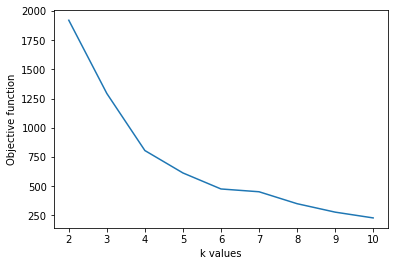

In [7]:
plt.plot([key for key,value in k_scores.items()], [value for key,value in k_scores.items()])
plt.xlabel('k values')
plt.ylabel('Objective function')